This nb contents:

[Descriptive Statistics](#1)

[Income dataset](#2) -  Example of a real data set with statistic analyzing techniques

[Hypothesis testing](#3) - Using package: scipy.stats as stats 

[Ordinary least squares](#4) - Using package: statsmodels.api as sm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

import statsmodels.api as sm

In [12]:
df = pd.read_csv("customer.txt")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## <a name="1"></a> Descriptive Statistics

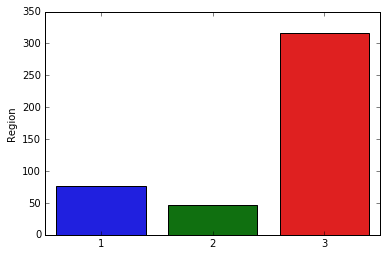

In [8]:
dnc = df["Region"].value_counts()
sns.barplot(dnc.index, dnc)

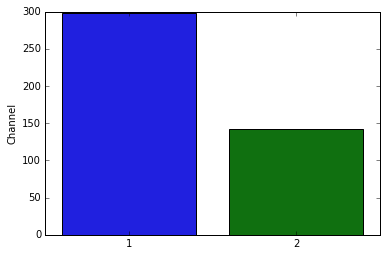

In [9]:
dfc = df["Channel"].value_counts()
sns.barplot(dfc.index, dfc)

In [10]:
df.iloc[:,range(3,8)].describe()

,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000
mean,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


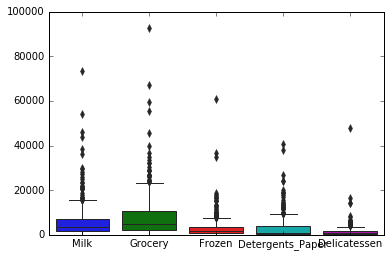

In [11]:
num = df.iloc[:,range(3,8)]
sns.boxplot(data=num)

## <a name="2"></a> Income dataset

In [14]:
income = pd.read_csv("Family Income and Expenditure.csv")
income.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


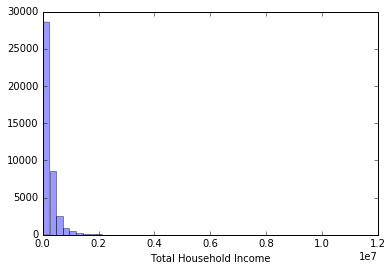

In [15]:
income = income["Total Household Income"]
sns.distplot(income, kde=False, rug=False)

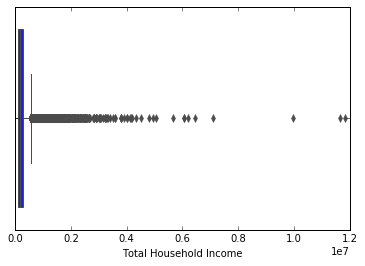

In [16]:
sns.boxplot(income)

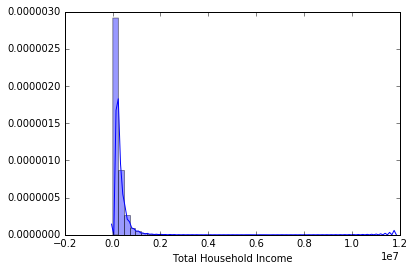

In [17]:
sns.distplot(income)

In [20]:
income.mean()    

247555.58480165608

In [19]:
income.median()

164079.5

## <a name="3"></a> Hypothesis testing

In [22]:
# two-sided test
# stats.ttest_1samp() This is a two-sided test for the null hypothesis that the expected 
# value (mean) of a sample of independent observations a is equal to the given population 
# mean, popmean.
m = 288000
results = stats.ttest_1samp(income, m)
results

Ttest_1sampResult(statistic=-28.735029777468494, pvalue=8.0718210391489152e-180)

In [23]:
# one-sided test, lower tailed

m = 230000
results = stats.ttest_1samp(income, m)
alpha = 0.05
if (results[0] < 0) & (results[1]/2 < alpha):
    print("reject null hypothesis, mean is less than {}".format(m))
else:
    print("do not reject null hypothesis")

do not reject null hypothesis


In [24]:
# one-sided test, upper tailed

m = 230000
results = stats.ttest_1samp(income, m)
alpha = 0.05
if (results[0] > 0) & (results[1]/2 < alpha):
    print("reject null hypothesis, mean is greater than {}".format(m))
else:
    print("do not reject null hypothesis")

reject null hypothesis, mean is greater than 230000


## <a name="4"></a> Ordinary least squares

In [27]:
dat = sm.datasets.get_rdataset("diamonds", "ggplot2").data
dat.shape

(53940, 10)

In [29]:
dat.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [31]:
dat.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [28]:
# Correlation
random_rows = np.random.choice(np.arange(1, 5000), 100)
sample = dat.iloc[random_rows,:]

df = sample[['price', 'carat', 'x','y','z']]
df.corr()

,price,carat,x,y,z
price,1.000000,0.876111,0.911948,0.919545,0.896265
carat,0.876111,1.000000,0.978124,0.973044,0.985044
x,0.911948,0.978124,1.000000,0.995546,0.969134
y,0.919545,0.973044,0.995546,1.000000,0.965725
z,0.896265,0.985044,0.969134,0.965725,1.000000


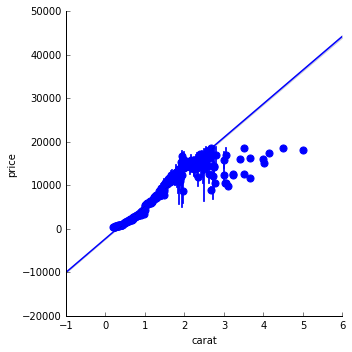

In [32]:
# sns regression plot

sns.lmplot(x = 'carat', y = 'price', data = dat, x_estimator=np.mean)

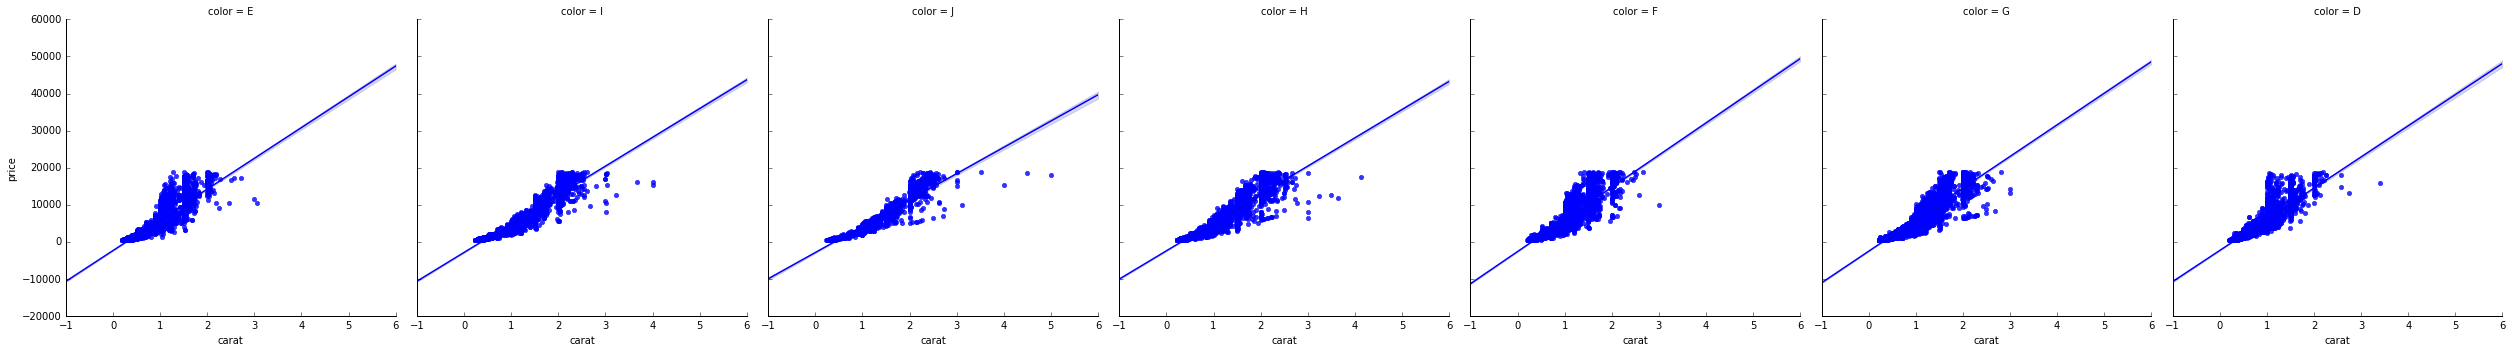

In [33]:
sns.lmplot(x="carat", y="price", data=dat, col="color")

In [34]:
# OLS
y = dat['price']
X = dat[['carat', 'x', 'y', 'depth']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 8.037e+04
Date:                Sat, 06 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:30:00   Log-Likelihood:            -4.7145e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53935   BIC:                         9.429e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.197e+04    330.313     36.224      0.000    1.13e+04    1.26e+04
carat       1.062e+04     63.806    166.379      0.000    1.05e+04    1.07e+04
x          -1335.5777     36.407    -36.684      0.000   -1406.936   -1264.219
y            102.6361     25.525      4.021      0.000      52.608     152.665
depth       -152.8349      4.683    -32.634      0.000    -162.014    -143.656
==============================================================================
Omnibus:                    14209.043   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           354182.678
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                      15.474   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Anscome dataset

In [36]:
anscombe = sns.load_dataset("anscombe")

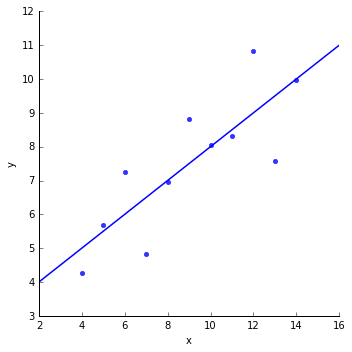

In [37]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None)

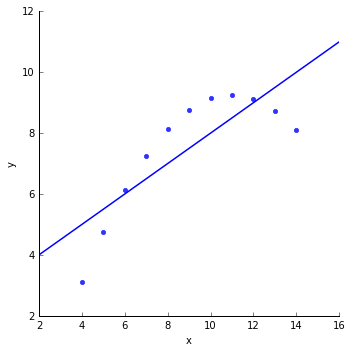

In [38]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None)

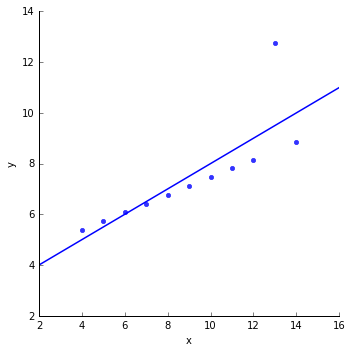

In [39]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None)

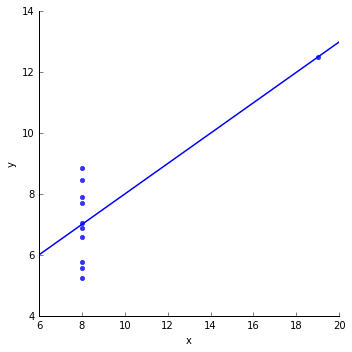

In [40]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"), ci=None)